## The problem of overfitting and regularization

### An overfitting model

Iteration      0: Cost = 39.36883
Iteration  20000: Cost = 0.68391
Iteration  40000: Cost = 0.24478
Iteration  60000: Cost = 0.08761
Iteration  80000: Cost = 0.03136
Iteration 100000: Cost = 0.01122
Iteration 120000: Cost = 0.00402
Iteration 140000: Cost = 0.00144
Iteration 160000: Cost = 0.00051
Iteration 180000: Cost = 0.00018
w = [  92.12398188 -154.72201692   50.23295633  134.39945208   95.03833921
   -2.46576718 -113.77055269], b = 10.125253162694953


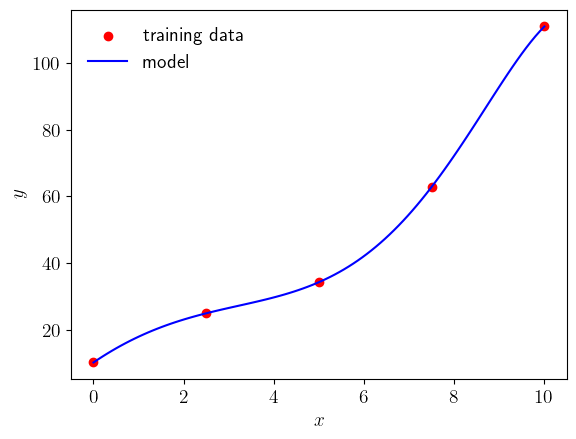

In [1]:
%run ../src.ipynb
%run ../utils.ipynb

x = np.linspace(0,10,5)
y = np.power(x,2)+1+30*np.random.rand(x.size)
x = np.reshape(x,(-1,1))

# feature scaling
# mu = np.mean(x, axis=0)
# sigma = np.std(x, axis=0)

# xScaled = (x-mu)/sigma

maxVal = x.max(0)
minVal = x.min(0)
xScaled = (x-minVal)/(maxVal-minVal)# between 0 and 1

N = 7 # high order to induce overfitting
xScaledMapped = feature_mapping(xScaled,N)

m, n = xScaledMapped.shape;
w0 = np.zeros(n)
w0[1] = 2
b0 = 1
alpha = 5e-1
numberIterations = 200000

w,b,J = gradient_descent(xScaledMapped,y,w0,b0,alpha,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

def predictPLOT(x,xScaled,N,w,b):
    xTest = np.linspace(x[0],x[-1],100)
    xTestScaled = np.linspace(xScaled[0],xScaled[-1],100)
    xTestMapped = feature_mapping(xTestScaled,N)
    yhat = prediction_linear_regression(w,b,xTestMapped)
    plt.scatter(x,y,marker='o',c='r',label='training data')
    plt.plot(xTest,yhat,'-b',label='model')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)
    

predictPLOT(x,xScaled,N,w,b)
plt.show()

### Regularization

Iteration      0: Cost = 3408.13470
Iteration   2000: Cost = 72.46842
Iteration   4000: Cost = 72.46842
Iteration   6000: Cost = 72.46842
Iteration   8000: Cost = 72.46842
Iteration  10000: Cost = 72.46842
Iteration  12000: Cost = 72.46842
Iteration  14000: Cost = 72.46842
Iteration  16000: Cost = 72.46842
Iteration  18000: Cost = 72.46842
w = [17.05197546 14.95925536 13.23358946 11.87619994 10.83031845 10.03292034
  9.42861143], b = 19.752198953657384


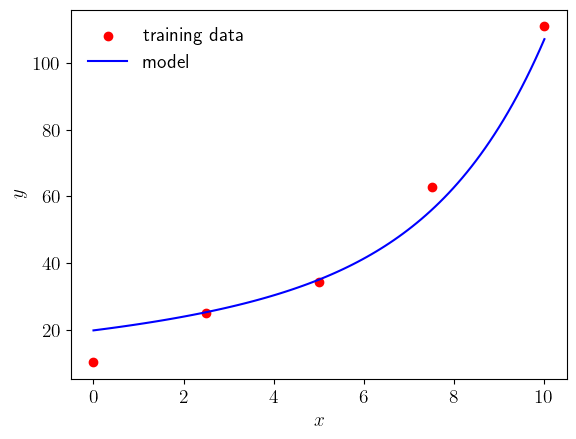

In [2]:
lambda_ = 0.5
numberIterations = 20000
w,b,J = gradient_descent_regularization(xScaledMapped,y,w0,b0,alpha,lambda_,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

predictPLOT(x,xScaled,N,w,b)
plt.show()